# Stable Diffussion Inctro

In [13]:
device = "cuda"

In [3]:
%pip install -qq -U diffusers datasets transformers accelerate ftfy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from pathlib import Path
from huggingface_hub import notebook_login
if not (Path.home()/'.huggingface'/'token').exists(): notebook_login()

In [9]:
!rm -rf ./imitools && git clone https://github.com/GDi4K/imitools.git
!pip install -q duckduckgo_search

Cloning into 'imitools'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 119 (delta 62), reused 33 (delta 15), pack-reused 0
Receiving objects: 100% (119/119), 5.78 MiB | 5.15 MiB/s, done.
Resolving deltas: 100% (62/62), done.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.0a0+293.g0930f712e6 requires pandas<1.4.0dev0,>=1.0, but you have pandas 1.4.2 which is incompatible.


In [18]:
import imitools as I

## Run Stable Diffussion 2.0

In [15]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch

repo_id = "stabilityai/stable-diffusion-2"

pipe = DiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16, revision="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

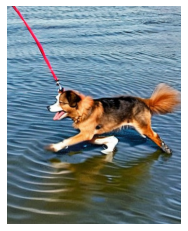

In [31]:
prompt = "A dog walking on the water"
negative_prompt = "realistic"
I.wrap(pipe(prompt, negative_prompt=negative_prompt, guidance_scale=9, width=512, height=640).images).show()